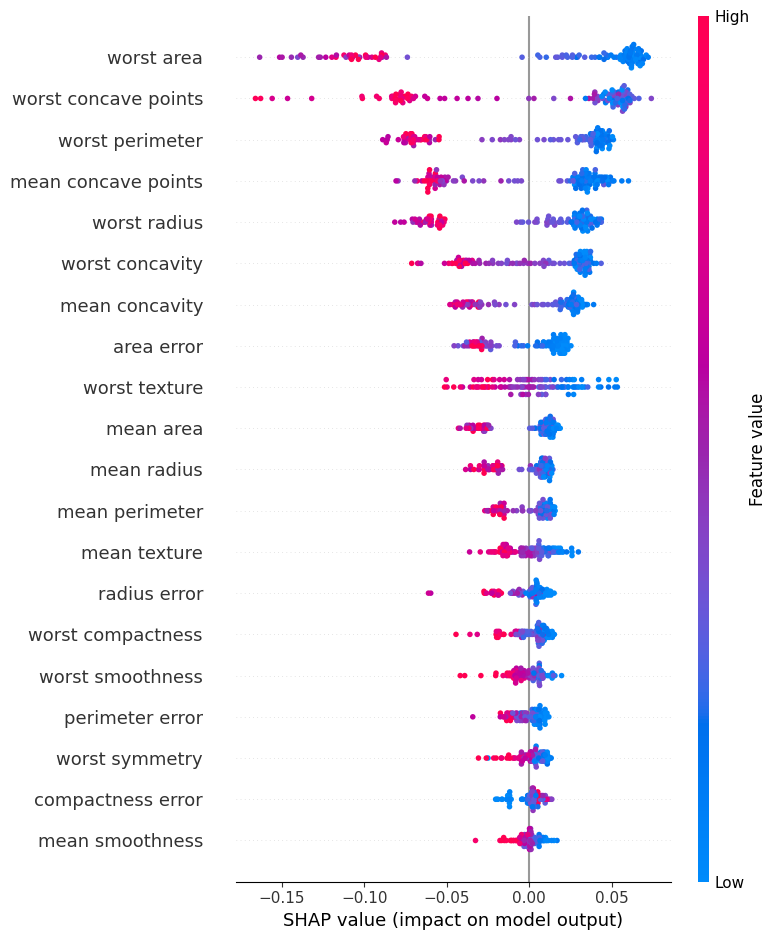

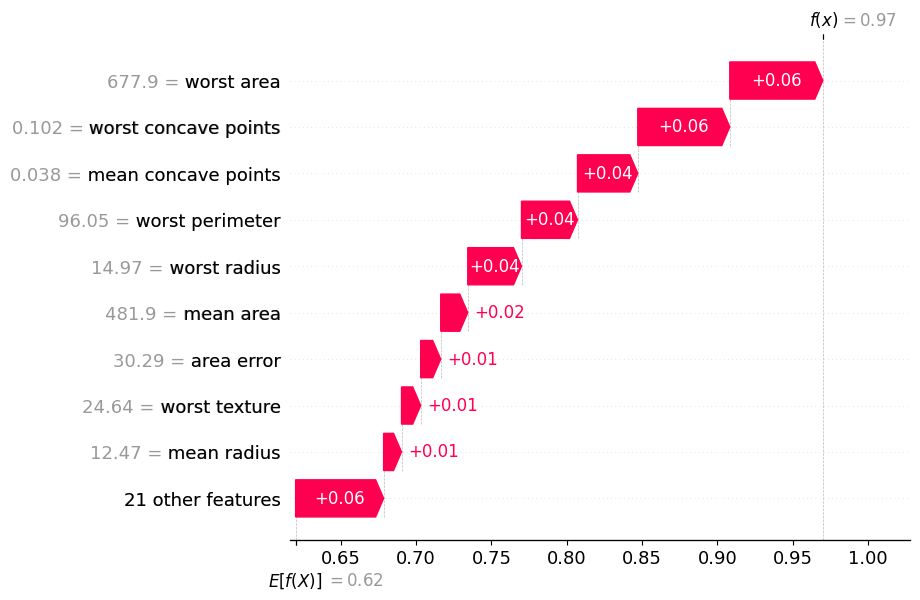

In [5]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# 1. Load Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Create Explainer
# In newer SHAP versions, using the generic Explainer is more stable for Waterfall plots
explainer = shap.Explainer(model, X_train)
shap_values_all = explainer(X_test)
plt.show()
# 4. Visualize
# 4a. Summary Plot (The "Population" View)
# Shows which medical features matter most across all patients
shap.summary_plot(shap_values_all[:, :, 1], X_test)

# 4b. Waterfall Plot (The "Patient" View)
# Explains why the model made a specific decision for Patient #1
shap.plots.waterfall(shap_values_all[0, :, 1])

# Save the Summary Plot
shap.summary_plot(shap_values_all[:, :, 1], X_test, show=False)
plt.savefig("global_explanation.png", bbox_inches='tight')
plt.close()

# Save the Waterfall Plot for the first patient
shap.plots.waterfall(shap_values_all[0, :, 1], show=False)
plt.savefig("patient_0_explanation.png", bbox_inches='tight')
plt.close()
